HMM 성과 평가:
MAE: 1593514.9582545804
RMSE: 6506175.1541879


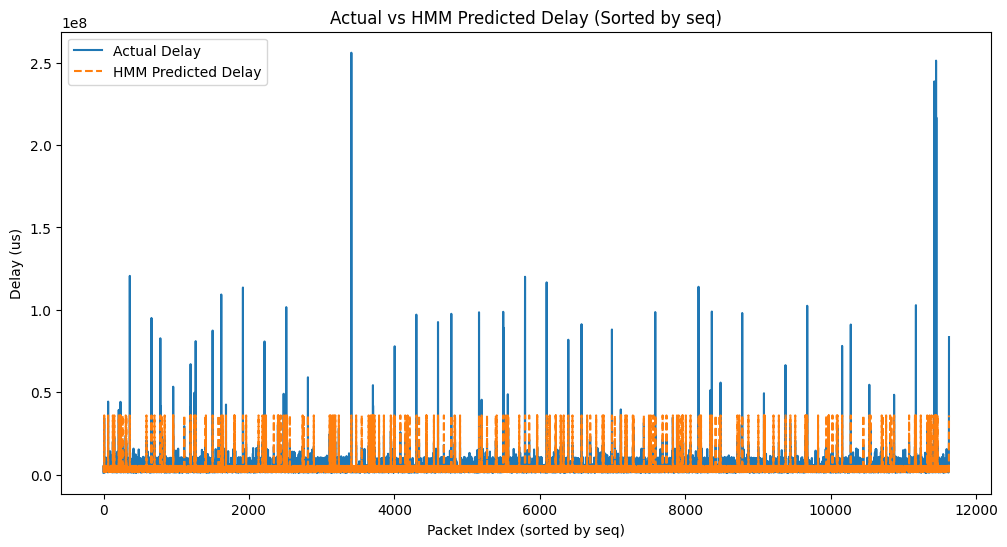

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# delay.txt에서 데이터를 읽어옴
with open("delay.txt", "r") as file:
    lines = file.readlines()

# seq, delay 쌍 추출
data = []
for line in lines:
    match = re.search(r"seq\[(\d+)\],\s*delay\s*=\s*(\d+)", line)
    if match:
        seq = int(match.group(1))
        delay = int(match.group(2))
        data.append((seq, delay))

# DataFrame으로 변환 후 seq 기준 정렬
df = pd.DataFrame(data, columns=["seq", "delay"])
df = df.sort_values(by="seq").reset_index(drop=True)

# 관측값 준비 (HMM은 2D array를 사용함)
observations = df["delay"].values.reshape(-1, 1)

# Gaussian HMM 모델 구축
# n_components: HMM의 상태 수 (필요에 따라 조정)
n_components = 3  
hmm_model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000, random_state=42)
hmm_model.fit(observations)

# 각 시점의 숨겨진 상태 예측
hidden_states = hmm_model.predict(observations)

# 각 상태의 평균을 해당 상태의 예측 값으로 사용
predicted_delay = np.array([hmm_model.means_[state, 0] for state in hidden_states])

# 성과 측정 (MAE와 RMSE)
mae = mean_absolute_error(df["delay"].values, predicted_delay)
mse = mean_squared_error(df["delay"].values, predicted_delay)
rmse = np.sqrt(mse)

print("HMM 성과 평가:")
print("MAE:", mae)
print("RMSE:", rmse)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["delay"].values, label='Actual Delay')
plt.plot(predicted_delay, label='HMM Predicted Delay', linestyle='--')
plt.legend()
plt.title("Actual vs HMM Predicted Delay (Sorted by seq)")
plt.xlabel("Packet Index (sorted by seq)")
plt.ylabel("Delay (us)")
plt.show()
